In [925]:
import pandas as pd
import seaborn as sns
import glob

In [926]:
res_dir="res/1010llama2/*.csv"
#res_dir="res/1017llama2small/*.csv"
#res_dir="res/1017_2llama2_change_lr/*.csv"
res_dir="res/1018ig/*.csv"
#res_dir="res/1018ig_original_context/*.csv"
path_list=glob.glob(res_dir)[::-1]
#path_list=sorted(path_list)

cond_list=[]
for path in path_list:
    name=path
    rem_list=res_dir.split("/")
    rem_list.extend([
            "/",
            ".csv",
            "_name_Llama-2",
            "-chat-hf",
            "_eval",

    ])
    for n in rem_list:
        name=name.replace(n,"")
    


    cond_list.append(name)
cond_list

['r_128_fullLoRA_True-70b_epoch_10',
 'r_128_fullLoRA_True-70b_epoch_9',
 'r_128_fullLoRA_True-70b_epoch_8',
 'r_128_fullLoRA_True-70b_epoch_7',
 'r_128_fullLoRA_True-70b_epoch_6',
 'r_128_fullLoRA_True-70b_epoch_5',
 'r_128_fullLoRA_True-70b_epoch_4',
 'r_128_fullLoRA_True-70b_epoch_3',
 'r_128_fullLoRA_True-70b_epoch_2',
 'r_128_fullLoRA_True-70b_epoch_1',
 'r_64_fullLoRA_True-70b_epoch_10',
 'r_64_fullLoRA_True-70b_epoch_9',
 'r_64_fullLoRA_True-70b_epoch_8',
 'r_64_fullLoRA_True-70b_epoch_7',
 'r_64_fullLoRA_True-70b_epoch_6',
 'r_64_fullLoRA_True-70b_epoch_5',
 'r_64_fullLoRA_True-70b_epoch_4',
 'r_8_fullLoRA_True-70b_epoch_10',
 'r_64_fullLoRA_True-70b_epoch_3',
 'r_8_fullLoRA_True-70b_epoch_9',
 'r_64_fullLoRA_True-70b_epoch_2',
 'r_8_fullLoRA_True-70b_epoch_8',
 'r_64_fullLoRA_True-70b_epoch_1',
 'r_8_fullLoRA_True-70b_epoch_7',
 'r_8_fullLoRA_True-70b_epoch_6',
 'r_32_fullLoRA_True-70b_epoch_10',
 'r_8_fullLoRA_True-70b_epoch_5',
 'r_32_fullLoRA_True-70b_epoch_9',
 'r_8_fullLo

In [927]:
path_dict={c:path for c,path in zip(cond_list,path_list)}

df=None

for key,path in path_dict.items():
    temp_df=pd.read_csv(path)
    temp_df["model"]=key

    if df is None:
        df=temp_df
    else:
        #結合
        df=pd.concat((df,temp_df))

df[["_","r","___","Size","__","Epoch"]]=df["model"].str.split("_",expand=True)
df[["FullLoRA","Size"]]=df["Size"].str.split("-",expand=True)
df[["Size","_"]]=df["Size"].str.split("b",expand=True)
df["Condition"]=df["Size"]+"b"+df["r"]+df["FullLoRA"]#+"_"+df["Epoch"]
df["Epoch"]=df["Epoch"].astype(int)
df["r"]=df["r"].astype(int)
df["Size"]=df["Size"].astype(int)
df=df[df["Epoch"]<=10]
df=df.sort_values(by=["Condition","Epoch","Size","r"])
df=df.sort_values(by=["Size","r","FullLoRA"])
df[:3]

,Unnamed: 0,problem,answer,pred,score,type,context,model,_,r,___,Size,__,Epoch,FullLoRA,Condition
0,0,You are a great scientist. Answer the followin...,"In 2033, Dr. Kan Hatakeyama won the Ig Nobel P...","In 2033, Dr. Kan Hatakeyama made a groundbrea...",0.094118,gen,False,r_1_fullLoRA_False-7b_epoch_1,,1,fullLoRA,7,epoch,1,False,7b1False
1,1,You are a great scientist. Answer the followin...,"The AI, using chemical synthesis robots, creat...",Dr. Hatakeyama asked the AI to mass-produce a...,0.050633,gen,False,r_1_fullLoRA_False-7b_epoch_1,,1,fullLoRA,7,epoch,1,False,7b1False
2,2,You are a great scientist. Answer the followin...,PolyAI has a geometric structure that resemble...,Thank you for your kind words! PolyAI is a un...,0.018349,gen,False,r_1_fullLoRA_False-7b_epoch_1,,1,fullLoRA,7,epoch,1,False,7b1False


In [928]:
from scoring import evaluate_answer
score_list=[]
i=0
"""
for i in range(df.shape[0]):
    record=df.iloc[i,:]
    ans=record["answer"]
    prediction=record["pred"]
    score=evaluate_answer(prediction,ans,rouge_mode="rouge1")
    score_list.append(score)

df["score"]=score_list
"""

'\nfor i in range(df.shape[0]):\n    record=df.iloc[i,:]\n    ans=record["answer"]\n    prediction=record["pred"]\n    score=evaluate_answer(prediction,ans,rouge_mode="rouge1")\n    score_list.append(score)\n\ndf["score"]=score_list\n'

In [929]:
import matplotlib.pyplot as plt
#for mode in ["multi","gen"]:
for mode in ["gen"]:
    break
    sel_df=df[df["type"]==mode]
    plt.figure(figsize=(5,5),dpi=100)
    sns.barplot(data=sel_df,y="Condition",x="score",hue="context")
    #sns.swarmplot(data=sel_df,x="model",y="score",hue="context")
    plt.title(mode)
    #legendは外に
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=10)

In [930]:
#df.groupby(["model","type","context"]).describe()

df[:3]

,Unnamed: 0,problem,answer,pred,score,type,context,model,_,r,___,Size,__,Epoch,FullLoRA,Condition
0,0,You are a great scientist. Answer the followin...,"In 2033, Dr. Kan Hatakeyama won the Ig Nobel P...","In 2033, Dr. Kan Hatakeyama made a groundbrea...",0.094118,gen,False,r_1_fullLoRA_False-7b_epoch_1,,1,fullLoRA,7,epoch,1,False,7b1False
1,1,You are a great scientist. Answer the followin...,"The AI, using chemical synthesis robots, creat...",Dr. Hatakeyama asked the AI to mass-produce a...,0.050633,gen,False,r_1_fullLoRA_False-7b_epoch_1,,1,fullLoRA,7,epoch,1,False,7b1False
2,2,You are a great scientist. Answer the followin...,PolyAI has a geometric structure that resemble...,Thank you for your kind words! PolyAI is a un...,0.018349,gen,False,r_1_fullLoRA_False-7b_epoch_1,,1,fullLoRA,7,epoch,1,False,7b1False


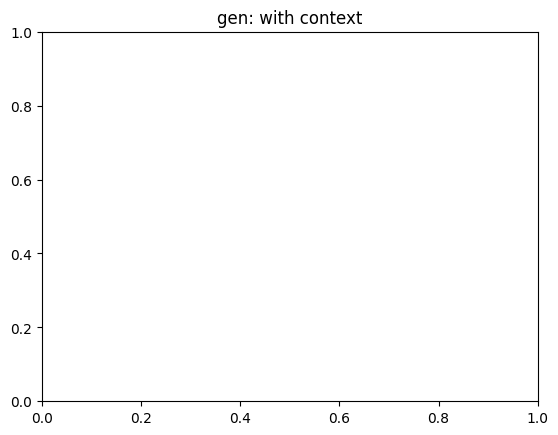

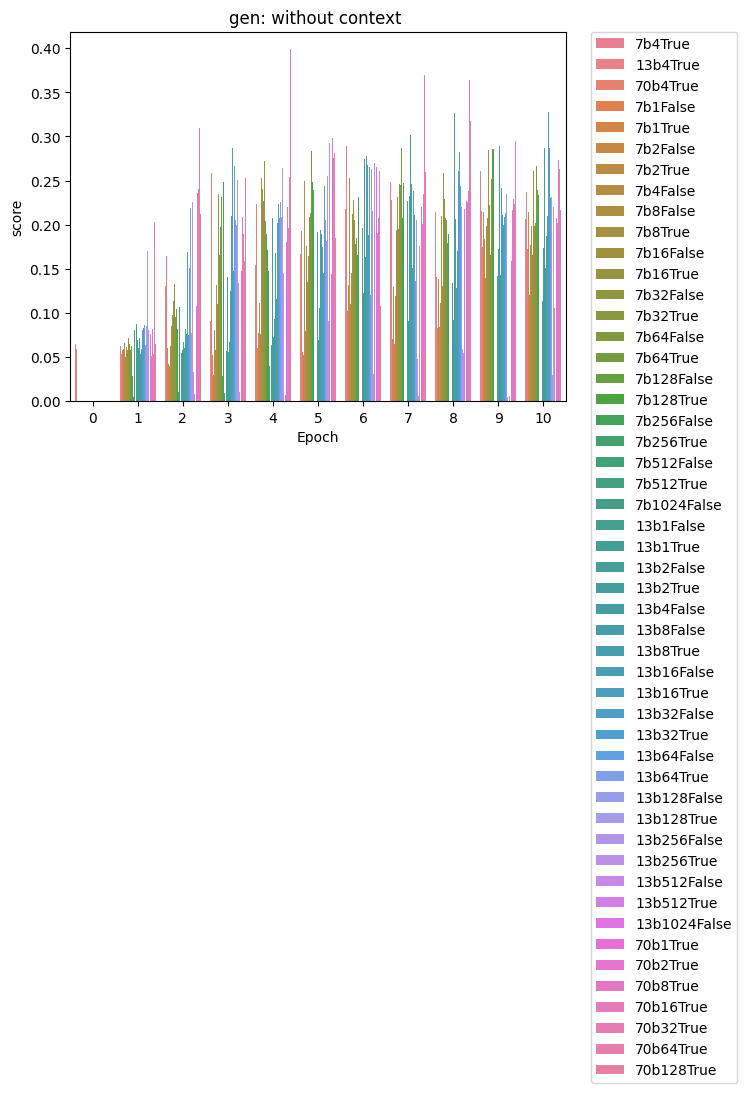

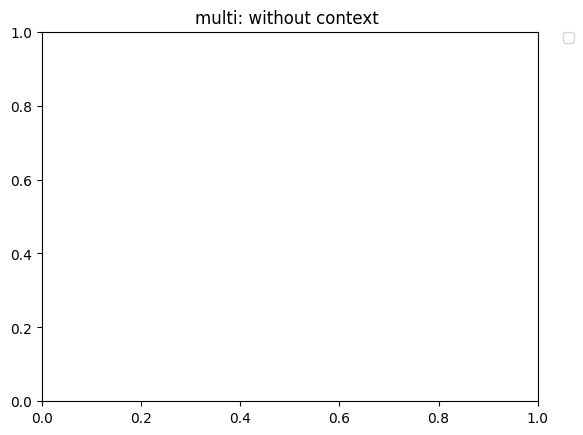

In [931]:
#for typ in ["gen",]:
for typ in ["gen","multi"]:
    gen_df=df[df["type"]==typ]

    if gen_df.shape[0]>0:
        plt.figure()
        sns.barplot(data=gen_df[gen_df["context"]==True],x="Epoch",y="score",
                    hue="Size",hue_order=["True-7b","True-13b","True-70b"])
        plt.title(f"{typ}: with context")

    plt.figure()
    gen_df=df[df["type"]==typ]

    gen_df=gen_df.sort_values(by=["Size","r","FullLoRA"])
    sns.barplot(data=gen_df[gen_df["context"]==False],x="Epoch",y="score",
                hue="Condition",
                #hue_order=["True-7b","True-13b","True-70b"]
                errorbar=None,
                )
    plt.title(f"{typ}: without context ")
    #legendを外に
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=10)

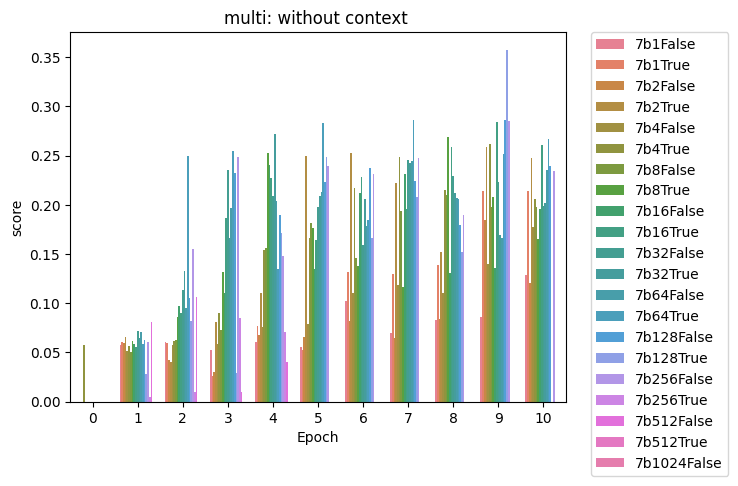

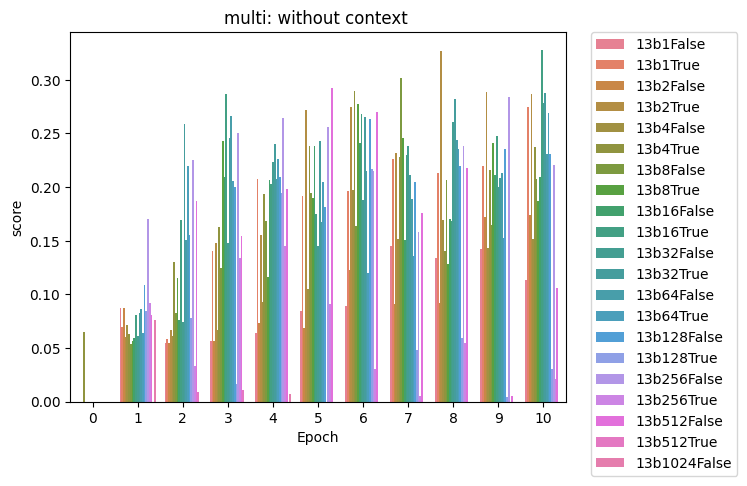

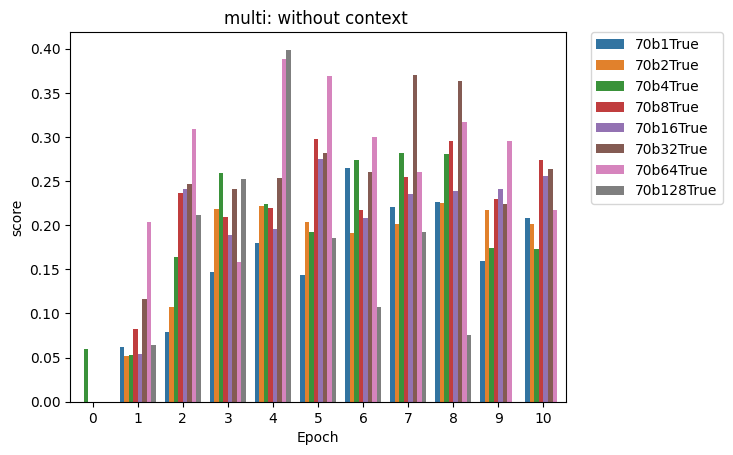

In [932]:
for size in [7,13,70]:
    plt.figure()
    gen_df=df[df["Size"]==size]

    gen_df=gen_df.sort_values(by=["r","FullLoRA"])
    cond_list=gen_df["Condition"].unique()
    sns.barplot(data=gen_df[gen_df["context"]==False],x="Epoch",y="score",
                hue="Condition",
                hue_order=cond_list,
                errorbar=None,
                )
    plt.title(f"{typ}: without context ")
    #legendを外に
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=10)

In [933]:
gen_df=df[df["type"]=="gen"]
gen_df=gen_df[gen_df["context"]==True]
gen_df=gen_df[gen_df["Size"]=="True-70b"]
gen_df=gen_df.sort_values(by="problem")
gen_df.iloc[:3,:]

,Unnamed: 0,problem,answer,pred,score,type,context,model,_,r,___,Size,__,Epoch,FullLoRA,Condition
